<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Eliminar registros nulos
data.dropna(inplace=True)
# Resetear el índice para que sea consecutivo después de eliminar filas
data.reset_index(drop=True, inplace=True)


3. Determinar los elementos únicos dentro de la columna ocean_proximity.


In [7]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [8]:

cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]

data.groupby('ocean_proximity')[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023



5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

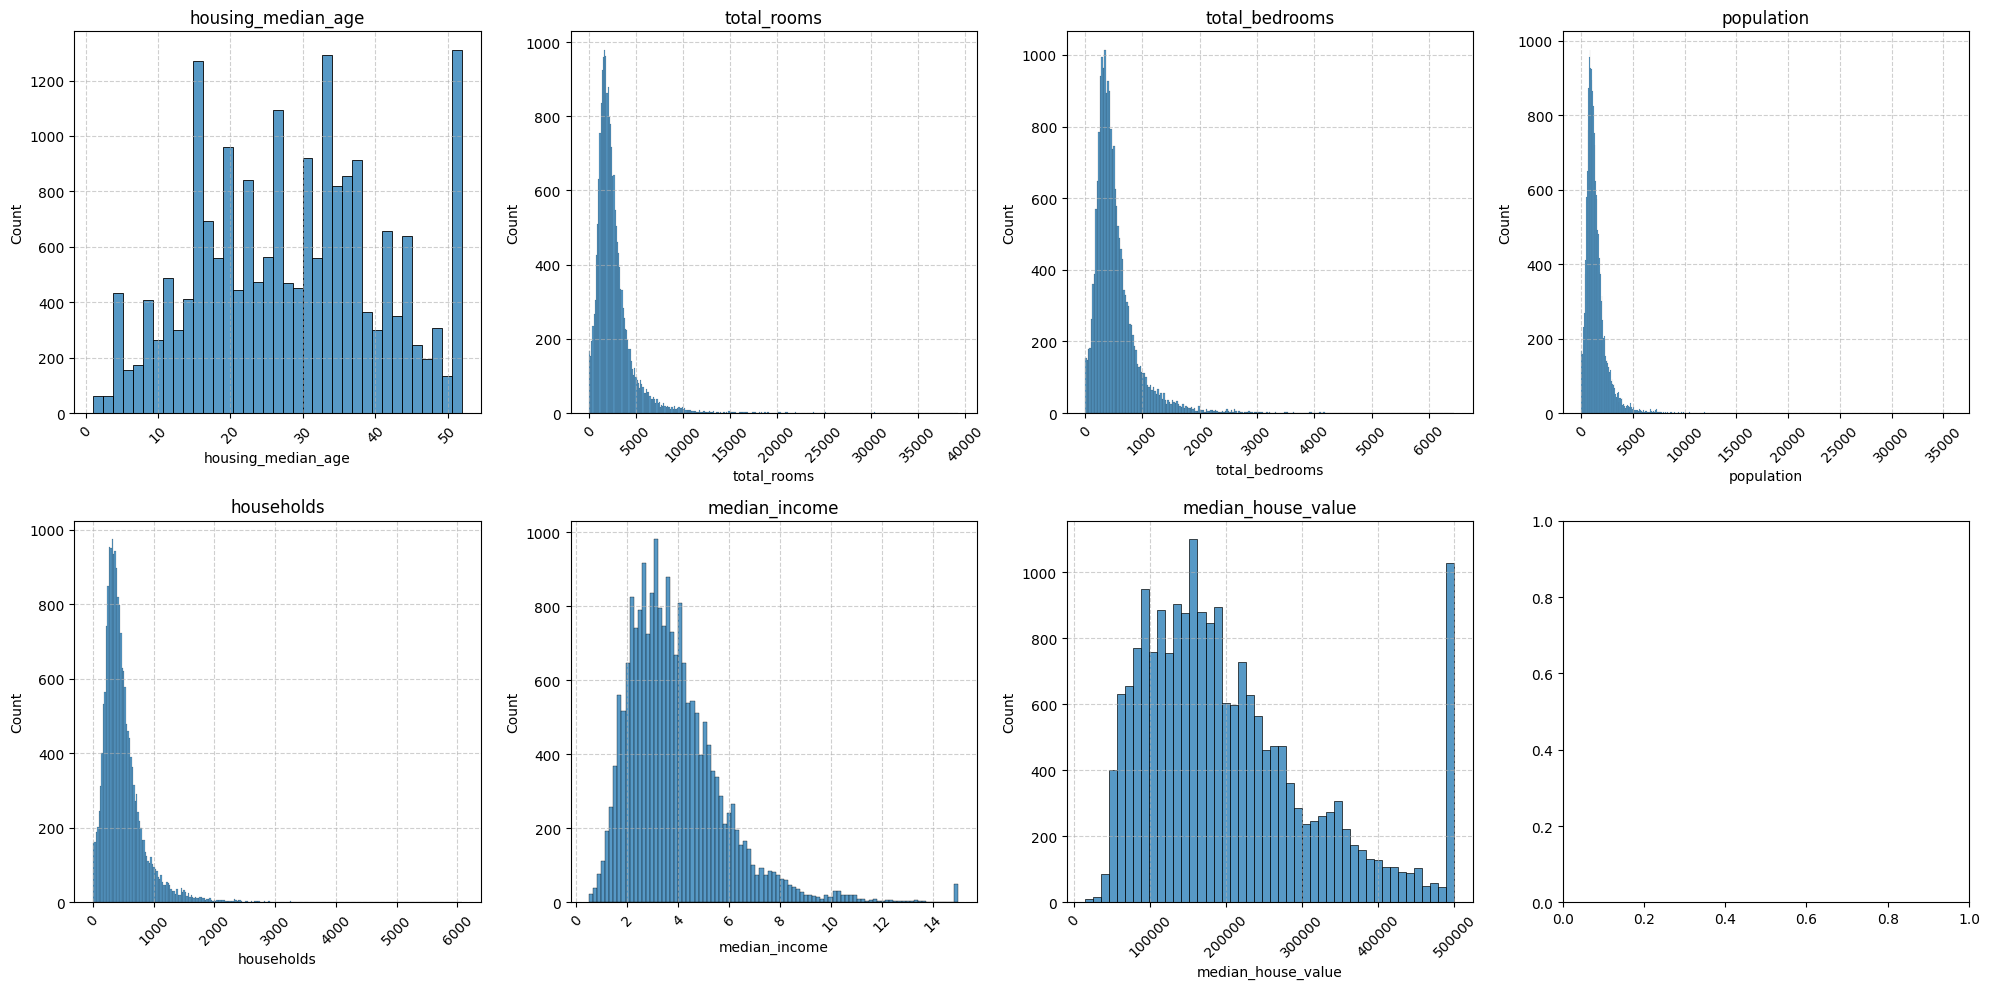

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(f'{col}')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [10]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


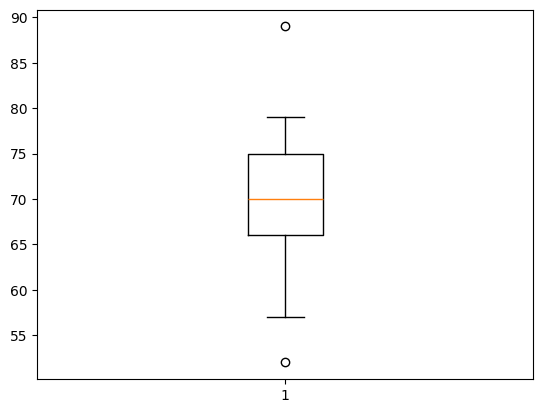

In [11]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)
plt.show()

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

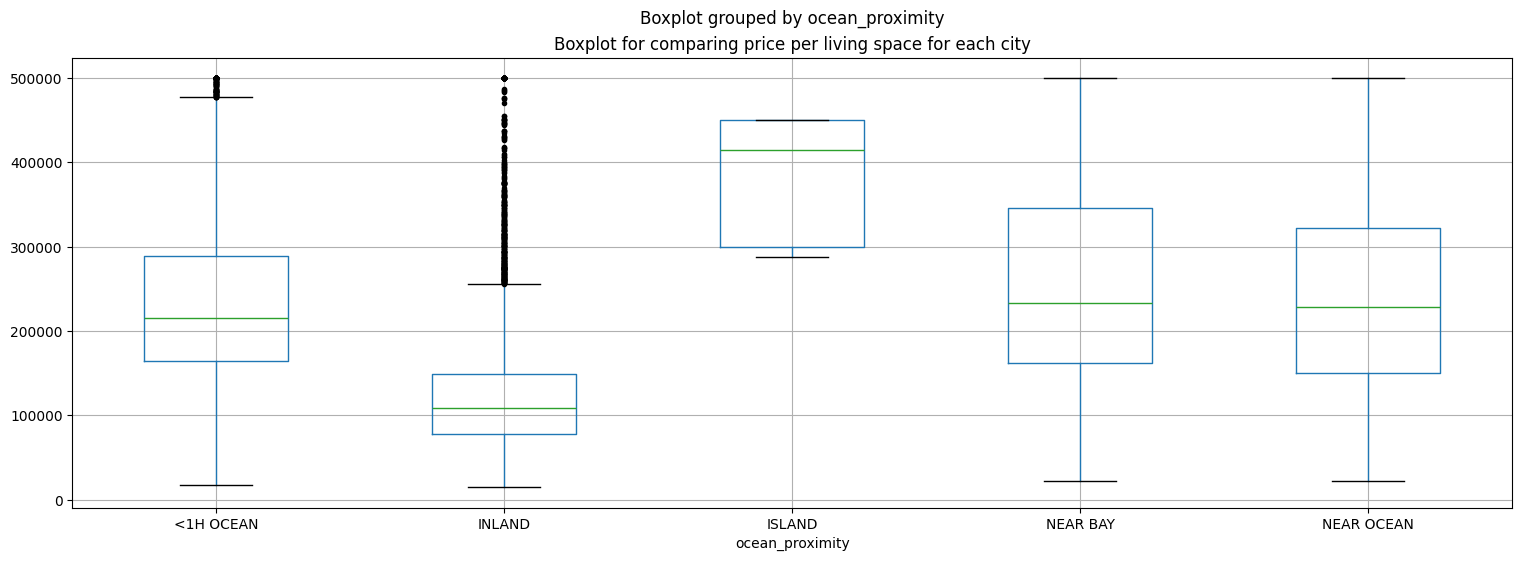

In [12]:
#draw boxplot
data.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

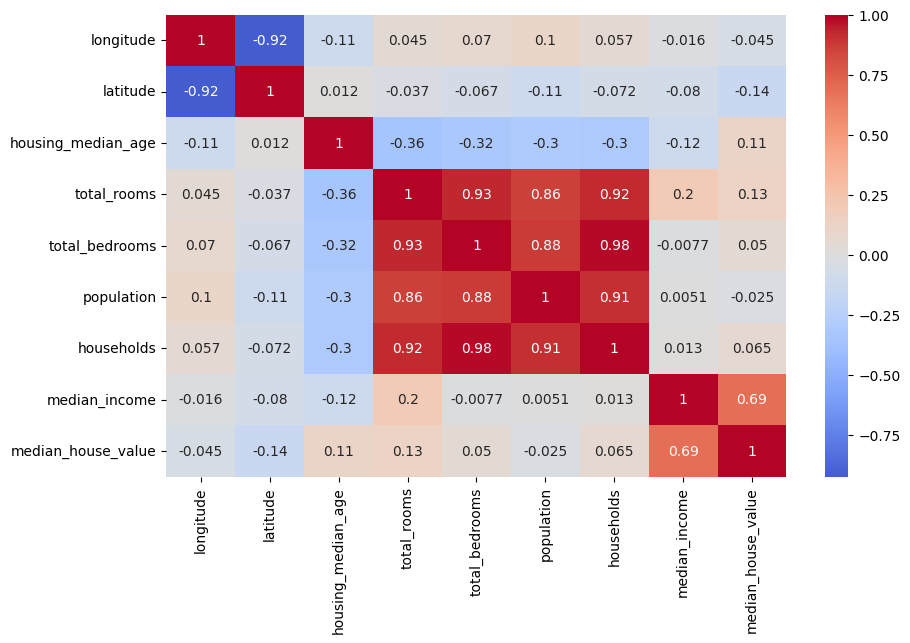

In [13]:
corr_matrix = data.select_dtypes(include=['float', 'int']).corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```


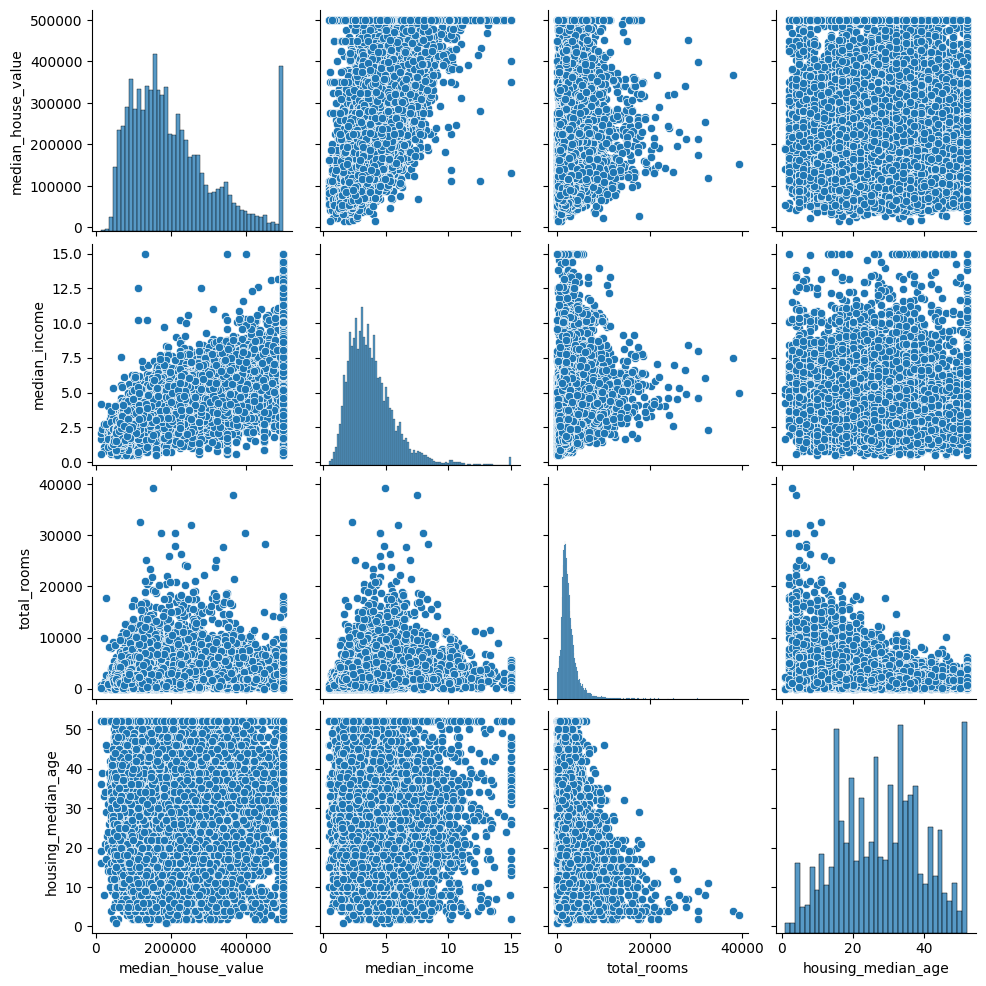

In [14]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(data[cols])
plt.show()


10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

<Axes: xlabel='median_house_value', ylabel='median_income'>

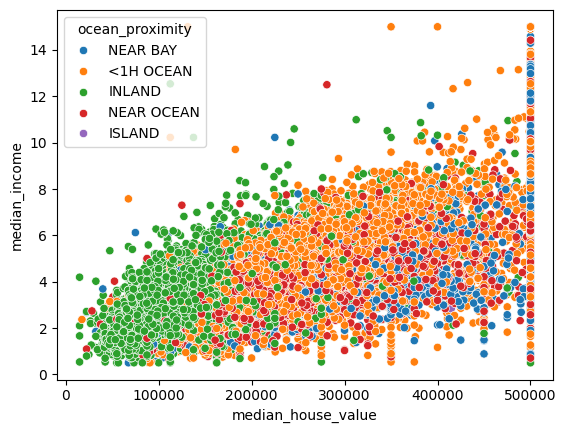

In [15]:
sns.scatterplot(data=data, x='median_house_value', y='median_income', hue='ocean_proximity')

# 2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```



In [16]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(data, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))


16346
4087


Es una subdivisión que parece adecuada, a menos que nuestro proposito sea analizar una columna categorica como `'ocean_proximity'`, ya que la proporción de datos por categoria no es uniforme y podemos caer en un Sampling Bias




12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```


<Axes: >

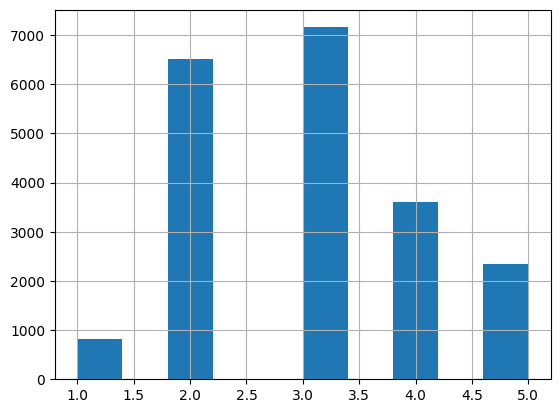

In [17]:
# Discreto a categorico
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


data.income_cat.hist()



La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```




In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [19]:
data["income_cat"].value_counts() / len(data)

income_cat
3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: count, dtype: float64

In [20]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: count, dtype: float64

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: count, dtype: float64

Se conservlo la proporcion usando el ```StratifiedShuffleSplit()```

In [22]:
train_set, test_set \
    = train_test_split(data, test_size = 0.2, random_state = 7)

# train_set = train_set.drop("ocean_proximity", axis=1)
train_set["income_cat"].value_counts() / len(train_set)

income_cat
3    0.352747
2    0.319161
4    0.175639
5    0.112138
1    0.040316
Name: count, dtype: float64

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




In [23]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]= train_set["population"]/train_set["households"]



# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

In [24]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [25]:
#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = train_set["total_bedrooms"].median()
q = train_set["total_bedrooms"].fillna(median).copy()


q = pd.DataFrame(q)

q.isnull().sum()

total_bedrooms    0
dtype: int64

## imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```



In [26]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer(strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_ # Media por variable (

array([-1.19581067e+02,  3.56429616e+01,  2.86585709e+01,  2.64235899e+03,
        5.39962743e+02,  1.42904136e+03,  5.01266548e+02,  3.85400915e+00,
        2.06268638e+05,  3.00012235e+00,  5.42604060e+00,  2.13378101e-01,
        3.10064480e+00])

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


In [27]:
imp_mean.statistics_


array([-1.19581067e+02,  3.56429616e+01,  2.86585709e+01,  2.64235899e+03,
        5.39962743e+02,  1.42904136e+03,  5.01266548e+02,  3.85400915e+00,
        2.06268638e+05,  3.00012235e+00,  5.42604060e+00,  2.13378101e-01,
        3.10064480e+00])

In [28]:
df_train_num.drop(df_train_num.columns[9], axis=1).mean()

longitude                     -119.581067
latitude                        35.642962
housing_median_age              28.658571
total_rooms                   2642.358987
total_bedrooms                 539.962743
population                    1429.041356
households                     501.266548
median_income                    3.854009
median_house_value          206268.637771
rooms_per_household              5.426041
bedrooms_per_room                0.213378
population_per_household         3.100645
dtype: float64

```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [29]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.13,34.04,40.0,1444.0,312.0,881.0,303.0,3.1083,220500.0,3.0,4.765677,0.216066,2.907591
1,-117.86,33.88,19.0,1621.0,328.0,871.0,322.0,3.7361,201400.0,3.0,5.034161,0.202344,2.704969
2,-117.28,33.72,11.0,1161.0,235.0,640.0,210.0,2.1667,114600.0,2.0,5.528571,0.202412,3.047619
3,-118.01,33.94,35.0,1323.0,235.0,807.0,247.0,4.2708,174800.0,3.0,5.356275,0.177627,3.267206
4,-118.22,33.99,6.0,1499.0,437.0,1754.0,447.0,4.3164,143200.0,3.0,3.353468,0.291528,3.923937



# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```python
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


In [30]:
from sklearn.preprocessing import OneHotEncoder

train_set["ocean_proximity"].unique()
housing_cat = train_set[["ocean_proximity"]]
housing_cat


,ocean_proximity
6825,<1H OCEAN
10147,<1H OCEAN
12065,<1H OCEAN
7007,<1H OCEAN
7185,<1H OCEAN
...,...
13927,NEAR OCEAN
919,<1H OCEAN
5699,<1H OCEAN
10742,<1H OCEAN


In [31]:

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [32]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.13,34.04,40.0,1444.0,312.0,881.0,303.0,3.1083,220500.0,3.0,4.765677,0.216066,2.907591,1.0,0.0,0.0,0.0,0.0
1,-117.86,33.88,19.0,1621.0,328.0,871.0,322.0,3.7361,201400.0,3.0,5.034161,0.202344,2.704969,1.0,0.0,0.0,0.0,0.0
2,-117.28,33.72,11.0,1161.0,235.0,640.0,210.0,2.1667,114600.0,2.0,5.528571,0.202412,3.047619,1.0,0.0,0.0,0.0,0.0
3,-118.01,33.94,35.0,1323.0,235.0,807.0,247.0,4.2708,174800.0,3.0,5.356275,0.177627,3.267206,1.0,0.0,0.0,0.0,0.0
4,-118.22,33.99,6.0,1499.0,437.0,1754.0,447.0,4.3164,143200.0,3.0,3.353468,0.291528,3.923937,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-117.12,32.75,37.0,2344.0,546.0,1134.0,513.0,2.4394,118300.0,2.0,4.569201,0.232935,2.210526,0.0,0.0,0.0,0.0,1.0
16342,-121.92,37.48,23.0,4314.0,676.0,1972.0,623.0,5.3813,264400.0,4.0,6.924559,0.156699,3.165329,1.0,0.0,0.0,0.0,0.0
16343,-118.29,34.18,10.0,4292.0,1075.0,2719.0,987.0,3.6974,286600.0,3.0,4.348531,0.250466,2.754813,1.0,0.0,0.0,0.0,0.0
16344,-117.91,33.66,21.0,1708.0,505.0,1099.0,434.0,3.2250,193800.0,3.0,3.935484,0.295667,2.532258,1.0,0.0,0.0,0.0,0.0


In [33]:
test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"]
test_set["bedrooms_per_room"] = test_set["total_bedrooms"]/test_set["total_rooms"]
test_set["population_per_household"] = test_set["population"]/test_set["households"]

df_test_num = test_set.drop("ocean_proximity", axis=1)

X_ts = imp_mean.transform(df_test_num)
housing_ts = pd.DataFrame(X_ts, columns=df_test_num.columns)

housing_cat_ts = test_set[["ocean_proximity"]]
housing_cat_1hot_ts = cat_encoder.transform(housing_cat_ts)
df_cat_1hot_ts = pd.DataFrame(housing_cat_1hot_ts, columns=cat_encoder.categories_[0])
housing_ts_ = housing_ts.join(df_cat_1hot_ts)


Las líneas de código se encargan de codificar la columna `ocean_proximity` mediante un `OneHotEncoder`, transformando las categorías de texto en variables numéricas binarias (0 o 1). La informaciòn de cada categoria es representadad como una nueva columna independiente 



# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```






In [41]:

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale_train = housing_tr_[cols]
housing_scale_test = housing_ts_[cols]
housing_scale_train.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.13,34.04,40.0,1444.0,312.0,881.0,303.0,3.1083,1.0,0.0,0.0,0.0,0.0
1,-117.86,33.88,19.0,1621.0,328.0,871.0,322.0,3.7361,1.0,0.0,0.0,0.0,0.0
2,-117.28,33.72,11.0,1161.0,235.0,640.0,210.0,2.1667,1.0,0.0,0.0,0.0,0.0
3,-118.01,33.94,35.0,1323.0,235.0,807.0,247.0,4.2708,1.0,0.0,0.0,0.0,0.0
4,-118.22,33.99,6.0,1499.0,437.0,1754.0,447.0,4.3164,1.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale_train)

housing_train_scale = pd.DataFrame(scaler.transform(housing_scale_train), columns=housing_scale_train.columns)
housing_test_scale = pd.DataFrame(scaler.transform(housing_scale_test), columns=housing_scale_test.columns)





17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.




In [ ]:
# Escogemos features que tengan altos niveles de correlacion
cols = ["total_rooms",	"total_bedrooms",	"population",	"households"]
target = ["median_income"]

X_train = housing_train_scale[cols].values
y_train = housing_train_scale[target].values   
X_test = housing_test_scale[cols].values
y_test = housing_test_scale[target].values

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
model.score(X_test, y_test) # Acuracy

0.3563754444381704

1. ¿que puede concluir respecto al modelo empleado?


El modelo empleado no muestra un buen desempeño, ya que el valor del score obtenido es de aproximadamente 0.35, lo que significa que el modelo solo logra explicar alrededor del 35% de la variabilidad de los datos. En otras palabras, las predicciones no se ajustan bien a los valores reales y parece que el modelo no logra captar correctamente la relación entre las variables. Esto puede deberse a que la relación entre las variables no es lineal o a que existen otros factores que influyen en el valor de la vivienda y que no fueron considerados en el modelo.




2. ¿El modelo de regresión lineal es valido para lo construido,


Aunque el modelo de regresión lineal es matemáticamente válido, en este caso no parece ser la mejor opción para representar el comportamiento de los datos.
Es probable que sea necesario utilizar un modelo más complejo o con mayor capacidad de ajuste, como un modelo polinómico, un árbol de decisión o incluso un random forest,
que puedan capturar relaciones más complicadas entre las variables.


3. ¿qué informacion nos da el score?



El score que obtenemos con el método `.score()` nos da una idea de qué tan bien el modelo logra explicar los datos de prueba. Un valor cercano a 1 indicaría un buen ajuste, mientras que valores bajos, como el que obtuvimos, muestran que el modelo no está logrando predecir correctamente los valores reales.



4. ¿Puede ser ajustado a otro modelo?


Este modelo definitivamente puede mejorarse probando con otros tipos de algoritmos o aplicando técnicas de preprocesamiento, como la normalización de los datos, la selección de características relevantes o la regularización. Todo esto puede ayudar a que el modelo aprenda patrones más útiles y generalice mejor.


5. ¿Como puede autmatizar todo el proceso empleando pipelines?

Para automatizar todo el proceso utilizando pipelines, se puede usar la herramienta que ofrece scikit-learn llamada `Pipeline`. Esta permite unir en una sola secuencia todos los pasos que normalmente se harían por separado, como el preprocesamiento de los datos, la normalización, el entrenamiento del modelo y la predicción. De esta manera, todo el flujo de trabajo queda integrado y se puede ejecutar con unas pocas líneas de código, evitando errores y haciendo el proceso mucho más ordenado y repetible.

Por ejemplo, en lugar de escalar los datos manualmente, entrenar el modelo aparte y luego hacer las predicciones, el pipeline permite encadenar cada uno de esos pasos para que se realicen de forma automática. Así, cuando se entrena el pipeline, se ajustan todos los pasos internos y, cuando se hacen predicciones, se aplican las mismas transformaciones a los nuevos datos sin necesidad de repetir código.

